In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx 
import osmnx as osm
from fn_lib import *
from tqdm import tqdm
from run_unWRW import *
plt.rcParams['text.usetex'] = True

# Build

In [ ]:
G0 = OpenGraph("test")    
A0 = nx.adjacency_matrix(G0).toarray()
 



# print(f"\n V={nx.number_of_nodes(G0)}\n E={nx.number_of_edges(G0)}")

In [ ]:
def unW_RW(G0, n, tmax):
    A = nx.adjacency_matrix(G0).toarray()
    n0 = np.random.choice(A.shape[0], n)
    x = np.zeros((n, tmax), dtype=int)
    x[:, 0] = n0
    for t in tqdm(range(1, tmax)):

        xt = x[:, t-1]         
        Aw = A[xt]             
        deg = Aw.sum(axis=1)   
        # # optional safety (isolated nodes)
        # deg[deg == 0] = 1
        T = Aw / deg[:, None]
        r = np.random.rand(n)
        Tcdf = np.cumsum(T, axis=1)
        x[:, t] = (Tcdf >= r[:, None]).argmax(axis=1) #ITS updation
    return x

def unWRWplot(G0, n, tmax):
    X = unW_RW(G0, n, tmax)
    N = A0.shape[0]
    n = X.shape[0]

    P = np.zeros((N, tmax), dtype=float)

    rows = X.ravel()                                  # node indices
    cols = np.repeat(np.arange(tmax), n)              # time indices

    np.add.at(P, (rows, cols), 1)
    P /= n

    plt.imshow(P, vmin=0, vmax=1, aspect="auto")
    
    return None

In [ ]:
n = 1000; tmax = int(1e5)
X = unW_RW(G0, n, tmax)
X.shape

In [ ]:
# np.savez_compressed("./test_network_data/test_rw.npz", arr=X)

In [ ]:
N = A0.shape[0]
n = X.shape[0]

P = np.zeros((N, tmax), dtype=float)

rows = X.ravel()                                  # node indices
cols = np.repeat(np.arange(tmax), n)              # time indices

np.add.at(P, (rows, cols), 1)
P /= n


In [ ]:
P.shape

In [ ]:
# P_small = P[]  # take every 10th row and column
plt.imshow(P, vmin=0, vmax=1, aspect="auto")


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Suppose A0 is your adjacency matrix
N = A0.shape[0]
G = nx.from_numpy_array(A0)  # undirected graph

# Node "activity" from P (sum over time or pick a time step)
node_activity = P[:, 0]  # or P.sum(axis=1) to use total over time

# Use a layout that preserves node indices
# For reproducibility, you can use nx.spring_layout with a fixed seed
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10,10))

# Draw nodes sized by activity
nx.draw_networkx_nodes(
    G, pos,
    node_size=100 + 500*node_activity / node_activity.max(),  # scale sizes
    node_color=node_activity,  # optional: color by activity
    cmap=plt.cm.viridis
)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Draw labels (node indices)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.axis('off')
plt.show()


# uRW on real sparse graph

In [40]:

city = "MUM"
G0 = OpenGraph(city)    
n = int(5e5); tmax = int(1e2)
X = unW_RW_EL(G0, n, tmax)
np.savez_compressed(f"./RW_{city}_n{n}_t{tmax}.npz", arr=X)

100%|██████████| 99/99 [03:34<00:00,  2.16s/it]


In [43]:
filename="RW_MUM_n500000_t100.npz"
X = np.load(f"./{filename}")["arr"]

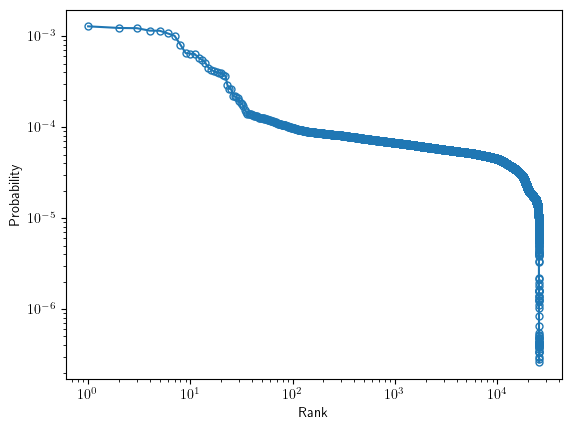

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# occupation counts
counts = np.bincount(X.ravel())
P = counts / counts.sum()

# remove zero-probability nodes
P = P[P > 0]

# sort probabilities (descending)
P_sorted = np.sort(P)[::-1]

# rank
rank = np.arange(1, len(P_sorted) + 1)

# semi-log plot (log y)
plt.figure()
plt.loglog(rank, P_sorted, 'o-', markersize=5,  fillstyle='none')
plt.xlabel("Rank")
plt.ylabel("Probability")

plt.show()

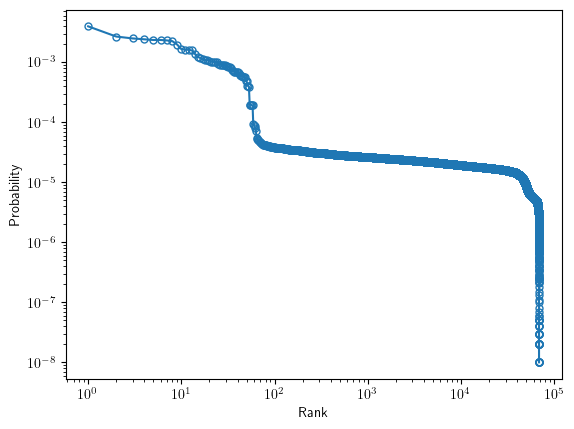

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# occupation counts
counts = np.bincount(X.ravel())
P = counts / counts.sum()

# remove zero-probability nodes
P = P[P > 0]

# sort probabilities (descending)
P_sorted = np.sort(P)[::-1]

# rank
rank = np.arange(1, len(P_sorted) + 1)

# semi-log plot (log y)
plt.figure()
plt.loglog(rank, P_sorted, 'o-', markersize=5,  fillstyle='none')
plt.xlabel("Rank")
plt.ylabel("Probability")
plt.show()


In [1]:
import os

In [5]:

os.listdir("./graph_data")

['IND.gpickle',
 'MUM.gpickle',
 'COK.gpickle',
 'BLR.gpickle',
 'CHD.gpickle',
 'LKO.gpickle',
 'NAG.gpickle',
 'Kol.gpickle',
 'JAI.gpickle',
 'DEL.gpickle',
 'PUN.gpickle',
 'HYD.gpickle',
 'VIZ.gpickle',
 'test.gpickle',
 'AHM.gpickle',
 'CHE.gpickle',
 'BPL.gpickle']